In [ ]:
#!pip install keras
from keras.datasets import imdb
from keras.utils import pad_sequences
import keras
import tensorflow as tf
import os
import numpy as np

VOCAB_SIZE = 88584

MAXLEN = 250
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)
len(train_data[1])
train_data=pad_sequences(train_data,MAXLEN)
test_data=pad_sequences(test_data,MAXLEN)
len(train_data[1])
#using rnn
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SimpleRNN,Dense
model = Sequential()
model.add(Embedding(VOCAB_SIZE, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['accuracy'])
history=model.fit(train_data,train_labels,epochs=10,validation_split=0.2)
results=model.evaluate(test_data,test_labels)
print(results)
word_index=imdb.get_word_index()
for i in range(10):
    print(list(word_index.keys())[i],':',list(word_index.values())[i])
def encode_text(text):
    tokens=keras.preprocessing.text.text_to_word_sequence(text)
    tokens=[word_index[word] if word in word_index else 0 for word in tokens]
    return pad_sequences([tokens],MAXLEN)[0]
reverse_word_index={value:key for (key,value) in word_index.items()}
def decode_integers(integers):
    PAD=0
    text=""
    for num in integers:
        if num!=PAD:
            text+=reverse_word_index[num] +" "

    return text[:-1]
def predict(text):
    encoded_text=encode_text(text)
    pred=encoded_text.reshape(1,250) #converting vector to 2d
    result=model.predict(pred)
    print(result[0])
text="that movie was amazing, i have to watch it again"
encoded=encode_text(text)
print(encoded)
print(decode_integers(encoded))
positive_review="That was a good movie, i will definitely watch it again"
predict(positive_review)

negative_review="Don't waste your time watching this movie, so disappointing"
predict(negative_review)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/10
625/625 [==============================] - 54s 84ms/step - loss: 0.5582 - accuracy: 0.6973 - val_loss: 0.4048 - val_accuracy: 0.8320
Epoch 2/10
625/625 [==============================] - 41s 65ms/step - loss: 0.3400 - accuracy: 0.8595 - val_loss: 0.3235 - val_accuracy: 0.8636
Epoch 3/10
625/625 [==============================] - 40s 64ms/step - loss: 0.2602 - accuracy: 0.8982 - val_loss: 0.3863 - val_accuracy: 0.8618
Epoch 4/10
625/625 [==============================] - 40s 65ms/step - loss: 0.2012 - accuracy: 0.9244 - val_loss: 0.3938 - val_accuracy: 0.8460
Epoch 5/10
625/625 [==============================] - 43s 69ms/step - loss: 0.1645 - accuracy: 0.9399 - val_loss: 0.4489 - val_accuracy: 0.8020
Epoch 6/10
625/625 [==============================] - 41s 65ms/step - loss: 0.1100 - accuracy: 0.9610 - val_loss: 0.4528 - val_accuracy: 0.8500
Epoch 7/10
625/625 [==============================] - 43s 68ms/step - l

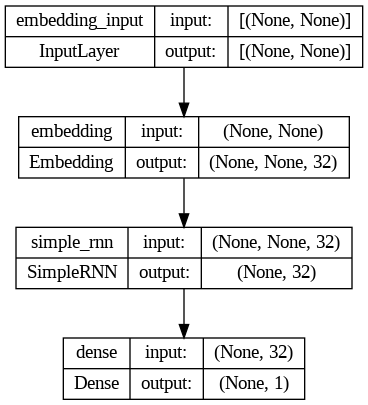

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)
